###### The cell above loads the visual style of the notebook when run.

In [23]:
from IPython.core.display import HTML
css_file = '../styles.css'
HTML(open(css_file, "r").read())

# Analysing Star Data

<section class="objectives panel panel-warning">
<div class="panel-heading">
<h2><span class="fa fa-certificate"></span>Learning Objectives</h2>
</div>
</section>

> * Explain what a library is, and what libraries are used for.
* Load a Python library and use the things it contains. 
* Read tabular data from a file into a program. 
* Assign values to variables.
* Select individual values and subsections from data. 
* Perform operations on arrays of data. 
* Display simple graphs. 

---

Words are useful, but what’s more useful are the sentences and stories we build with them. Similarly, while a lot of powerful tools are built into languages like Python, even more live in the libraries they are used to build.

In order to load our star data, we need to import a library called NumPy. In general you should use this library if you want to do fancy things with numbers, especially if you have matrices or arrays. We can load NumPy using:

In [24]:
import numpy

Importing a library is like getting a piece of lab equipment out of a storage locker and setting it up on the bench. Once you’ve loaded the library, we can ask the library to read our data file for us: 

In [25]:
numpy.loadtxt(fname='data/star_data_01.csv', delimiter=',')

array([[18.82835767, 18.68449456, 18.36846526, ..., 22.74609287,
        21.59114633, 22.94081404],
       [18.44871905, 19.02446975, 20.04453884, ..., 23.23142209,
        21.62410045, 23.72676083],
       [17.59471749, 17.86504252, 19.04176145, ..., 21.65369823,
        22.58501188, 22.75590757],
       ...,
       [19.14663683, 17.5576204 , 17.7209417 , ..., 23.08328494,
        23.2540362 , 22.54150028],
       [17.91820205, 17.51246092, 19.22285053, ..., 22.40570422,
        22.20877154, 23.69307697],
       [18.99298186, 18.17059033, 20.43678823, ..., 23.82297922,
        22.80203104, 23.13107049]])

The expression `numpy.loadtxt(...)` is a [function call](reference.html#function-call)
that asks Python to run the function `loadtxt` that belongs to the `numpy` library.
This [dotted notation](reference.html#dotted-notation) is used everywhere in Python
to refer to the parts of things as `thing.component`.

`numpy.loadtxt` has two [parameters](reference.html#parameter): the name of the file we want to read, and the [delimiter](reference.html#delimiter) that separates values on a line. These both need to be character strings (or [strings](reference.html#string) for short), so we put them in quotes.

When we are finished typing and press <kbd>Shift</kbd>+<kbd>Enter</kbd>, the notebook runs our command. Since we haven't told it to do anything else with the function's output, the notebook displays it.
In this case, that output is the data we just loaded. By default, only a few rows and columns are shown (with `...` to omit elements when displaying big arrays).

Our call to `numpy.loadtxt` read our file, but didn't save the data in memory. To do that,
we need to [assign](reference.html#assignment) the array to a [variable](reference.html#variable). A variable is just a name for a value, such as `x`, `current_temperature`, or `subject_id`.


## Variables

Python's variables must begin with a letter and are [case sensitive](reference.html#case-sensitive). We can create a new variable by assigning a value to it using `=`.
As an illustration, let's step back and instead of considering a table of data, consider the simplest "collection" of data, a single value. The line below assigns the value `55` to a variable `weight_kg`:

In [26]:
weight_kg = 55

This statement says to the computer "put the value of `55` inside the box labelled `weight_kg`". This is useful because we can use it later in calculations. For example: once a variable has a value, we can print it to the screen: 

In [27]:
print(weight_kg)

55


and do arithmetic with it: 

In [28]:
print('weight in pounds', 2.2*weight_kg)

weight in pounds 121.00000000000001


We can also change a variable’s value by assigning it a new one: 

In [29]:
weight_kg = 57.5
print ('weight in kilograms is now:', weight_kg)

weight in kilograms is now: 57.5


As the example above shows, we can print several things at once by separating them with commas.

We should imagine the variable as a box to store something in the computer's memory. The name of the variable is the label attached to the box, like a sticky note.

<img src='images/python-sticky-note-variables-01.svg'/>
<div style="text-align: center;">Figure: Variables as sticky note labels on boxes</div>

This means that assigning a value to one variable does *not* change the values of other variables. For example, let’s store the subject’s weight in pounds in a variable:

In [30]:
weight_lb = 2.2 * weight_kg
print ('weight in kilograms:', weight_kg, 'and in pounds:', weight_lb)

weight in kilograms: 57.5 and in pounds: 126.50000000000001


<img src='images/python-sticky-note-variables-02.svg'/>
<div style="text-align: center;">Figure: Creating another variable</div>

and then change `weight_kg`

In [31]:
weight_kg = 100.0
print ('weight in kilograms is now:', weight_kg, 'and weight in pounds is still:', weight_lb)

weight in kilograms is now: 100.0 and weight in pounds is still: 126.50000000000001


<img src='images/python-sticky-note-variables-03.svg'/>
<div style="text-align: center;">Figure: Updating a variable</div>
    
Since `weight_lb` doesn’t “remember” where its value came from, it isn’t 
automatically updated when `weight_kg` changes. This is different from the way 
spreadsheets work.

The statement `weight_kg=100.0` is not a mathematical equation. It's an instruction to the computer which means "take the value on the right-hand side (RHS; `100.0`), and store it in a variable with the name on the LHS (`weight_kg`)". The RHS is calculated first, then the result is put in the variable named on the left. Therefore, the following statement makes perfect sense in Python!

In [32]:
weight_kg = weight_kg - 5
print ('weight in kilograms is now:', weight_kg)

weight in kilograms is now: 95.0


Just as we can assign a single value to a variable, we can also assign an array of values to a variable using the same syntax. Let’s re-run `numpy.loadtxt` and save its result:

In [33]:
data = numpy.loadtxt(fname='data/star_data_01.csv', delimiter=',')

This statement doesn’t produce any output because assignment doesn’t display anything. If we want to check that our data has been loaded, we can print the variable’s value:

In [34]:
print(data)

[[18.82835767 18.68449456 18.36846526 ... 22.74609287 21.59114633
  22.94081404]
 [18.44871905 19.02446975 20.04453884 ... 23.23142209 21.62410045
  23.72676083]
 [17.59471749 17.86504252 19.04176145 ... 21.65369823 22.58501188
  22.75590757]
 ...
 [19.14663683 17.5576204  17.7209417  ... 23.08328494 23.2540362
  22.54150028]
 [17.91820205 17.51246092 19.22285053 ... 22.40570422 22.20877154
  23.69307697]
 [18.99298186 18.17059033 20.43678823 ... 23.82297922 22.80203104
  23.13107049]]


Now that our data is in memory, we can start doing things with it. First,
let's ask what [type](reference.html#type) of thing `data` refers to:

In [35]:
print( type(data) )

<class 'numpy.ndarray'>


The output tells us that `data` currently refers to an N-dimensional array (`ndarray`) created by the NumPy library. These data correspond to star's brightness over time. The rows are the individual stars and the columns are their brightness measurements.

We can see what its [shape](reference.html#shape) is like this:

In [36]:
print( data.shape )

(20, 101)


This tells us that `data` has 20 rows and 101 columns. 

When we created the
variable `data` to store our star data, we didn't just create the array, we also created information about the array, called [members](reference.html#member) or attributes. This extra information describes `data` in the same way an adjective describes a noun.

`data.shape` is an attribute  of `data` which described the dimensions of `data`. We use the same dotted notation for the attributes of variables that we use for the functions in libraries because they have the same part-and-whole relationship.

If we want to get a single number from the array, we must provide an [index](reference.html#index) in square braces (also called square brackets), just as we do in matrix notation in math:

In [37]:
print('first value in data:', data[0,0])

first value in data: 18.828357668404486


In [38]:
print('middle value in data:', data[10,50])

middle value in data: 22.929696738144226


The expression `data[10, 50]` may not surprise you if you've done some programming before,
but `data[0, 0]` might. Programming languages like Fortran and MATLAB start counting at 1,
because that's what human beings have done for thousands of years. Languages in the C family (including C++, Java, Perl, and Python) count from 0 because that's simpler for computers to do.

As a result, if we have an M$\times$N array in Python, its indices go from 0 to M-1 on the first axis and 0 to N-1 on the second. It takes a bit of getting used to, but one way to remember the rule is that the index is how many steps we have to take from the start to get the item we want.

<section class="panel panel-info">
<div class="panel-heading">
<h2><span class="fa fa-thumb-tack"></span>In the corner</h2>
</div>
</section>

> What may also surprise you is that when Python displays an array,
> it shows the element with index `[0, 0]` in the upper left corner
> rather than the lower left.
> This is consistent with the way mathematicians draw matrices,
> but different from the Cartesian coordinates.
> The indices are (row, column) instead of (column, row) for the same reason,
> which can be confusing when plotting data.

An index like `[10, 50]` selects a single element of an array,
but we can select whole sections as well.
For example,
we can select the first five measurements (columns) of brightness
for the first four stars (rows) like this:

In [39]:
print( data[0:4, 0:5] )

[[18.82835767 18.68449456 18.36846526 19.58984702 20.03332339]
 [18.44871905 19.02446975 20.04453884 18.37560557 20.13318031]
 [17.59471749 17.86504252 19.04176145 18.6676958  19.09431148]
 [18.1584409  19.6630396  19.33900909 19.53610008 19.49240261]]


The [slice](reference.html#slice) `0:4` means, "Start at index 0 and go up to, but not including, index 4." Again, the up-to-but-not-including takes a bit of getting used to, but the rule is that the difference between the upper and lower bounds is the number of values in the slice.

We don't have to start slices at 0:

In [40]:
print (data[5:10, 0:5])

[[18.54685036 17.38553589 18.62617314 18.97304937 18.46415131]
 [18.67357342 18.41288864 18.79151865 18.18382694 19.81400528]
 [17.85769513 17.60871584 17.3801041  19.27209263 19.8817563 ]
 [18.93911752 18.38229775 18.65671745 19.50607296 18.65884615]
 [18.01124928 17.54423449 19.16271396 18.79464109 19.12882441]]


We also don't have to include the upper and lower bound on the slice. If we don't include the lower bound, Python uses 0 by default;
if we don't include the upper, the slice runs to the end of the axis,
and if we don't include either (i.e., if we just use ':' on its own),
the slice includes everything:

In [41]:
small = data[:3, 98:]
print ('small is:')
print (small)

small is:
[[22.74609287 21.59114633 22.94081404]
 [23.23142209 21.62410045 23.72676083]
 [21.65369823 22.58501188 22.75590757]]


Arrays also "know" how to perform common mathematical operations on their values. The simplest operations with data are arithmetic: add, subtract, multiply, and divide. When you do such operations on arrays, the operation is done on each individual element of the array.

Thus:

In [42]:
doubledata = data * 2.0

will create a new array `doubledata` whose elements each have the value of two times the value of the corresponding elements in `data`:

In [43]:
print ('original:')
print (data[:3,98:])
print ('doubledata:')
print (doubledata[:3,98:])

original:
[[22.74609287 21.59114633 22.94081404]
 [23.23142209 21.62410045 23.72676083]
 [21.65369823 22.58501188 22.75590757]]
doubledata:
[[45.49218574 43.18229266 45.88162809]
 [46.46284418 43.2482009  47.45352166]
 [43.30739646 45.17002377 45.51181515]]


If, instead of taking an array and doing arithmetic with a single value (as above) you did the arithmetic operation with another array of the same shape, the operation will be done on corresponding elements of the two arrays.

Thus:

In [44]:
tripledata = data + doubledata

will give you an array where `tripledata[0,0]` will equal `doubledata[0,0]` plus `data[0,0]`, and so on for all other elements of the arrays.

In [45]:
print ('tripledata:')
print (tripledata[:3,98:])

tripledata:
[[68.2382786  64.77343899 68.82244213]
 [69.69426627 64.87230134 71.18028248]
 [64.96109469 67.75503565 68.26772272]]


Often, we want to do more than add, subtract, multiply, and divide values of data.
Arrays also know how to do more complex operations on their values.
If we want to find the average brightness for all stars at all times,
for example, we can just ask the array for its mean value

In [46]:
print (data.mean())

22.500200371916634


`mean` is a [method](reference.html#method) of the array, i.e., a function that belongs to it in the same way that the member `shape` does. If variables are nouns, methods are verbs: they are what the thing in question knows how to do. We need empty parentheses for `data.mean()`,
even when we're not passing in any parameters, to tell Python to go and do something for us. `data.shape` doesn't need `()` because it is just a description but `data.mean()` requires the `()` because it is an action. This will become clearer when we cover functions later.

Numpy arrays have lots of useful methods:

In [47]:
print ('maximum brightness:', data.max())
print ('minimum brightness:', data.min())
print ('standard deviation:', data.std())

maximum brightness: 26.974721031238875
minimum brightness: 16.44777007222038
standard deviation: 1.7109567056123969


When analyzing data, though, we often want to look at partial statistics, such as the maximum brightness per star or the average brightness per day. One way to do this is to create a new temporary array of the data we want, then ask it to do the calculation:

In [48]:
star_0 = data[0,:] # 0 on the first axis (row), everything on the second (column)
print ('maximum brightness for star 0:', star_0.max())

maximum brightness for star 0: 26.007299837461204


We don’t actually need to store the row in a variable of its own. Instead, we can combine the selection and the method call:

In [49]:
print ('mean brightness for star 2:', data[2,:].mean())

mean brightness for star 2: 22.426158099320048


What if we need the maximum brightness for all stars (as in the next diagram on the left), or the average at each time (as in the diagram on the right)? As the diagram below shows, we want to perform the operation across an axis: 

<img src='images/numpy_apply_axis.svg'/>
<div style="text-align: center;">Figure: Operations across axes</div>

To support this, most array methods allow us to specify the axis we want to work on. If we ask for the average across axis 0 (rows in our 2D example), we get:

In [50]:
print (data.mean(axis=0))

[18.09248632 18.35365907 18.85192129 18.71415503 19.37229196 19.52248221
 19.67364454 20.29042241 20.4574627  20.31294399 20.57276817 20.81105239
 21.22518779 21.33178541 21.27505307 21.18294918 21.55675437 21.40098742
 21.51005242 21.79133686 21.71258645 21.95332038 22.1794417  21.76243396
 21.90496963 22.30208365 22.00749989 21.8791797  21.86355606 21.85633962
 21.89303383 21.44298308 21.86877405 21.85459712 22.06337395 21.57714292
 21.49346007 21.31626957 21.40087753 21.2563051  21.21483226 21.50582255
 21.25908068 22.17820386 22.26884077 23.01761462 23.31593697 23.78381811
 24.08434858 24.18429216 24.04024153 23.82691284 24.10082433 24.13538645
 23.97002714 24.02488626 24.34074191 24.338722   24.13667692 24.13243851
 24.09342369 24.82766196 24.37718333 24.77509604 24.77981012 24.72882825
 24.25050139 24.30764042 24.39156066 24.23850235 24.1826964  24.13769011
 24.17456216 23.77952067 23.77599953 23.52540135 23.54859622 23.47995816
 23.30139227 23.1124789  23.25623871 22.86721499 22

As a quick check, we can ask this array what its shape is:

In [51]:
print  ( data.mean(axis=0).shape )

(101,)


The expression `(101,)` tells us we have an N$\times$1 vector,
so this is the average brightness as a function of time for all stars.

## Visualizing Data

The mathematician Richard Hamming once said, "The purpose of computing is insight, not numbers," and the best way to develop insight is often to visualize data. Visualization deserves an entire lecture (or [course](https://matthewturk.github.io/courses/is590adv-spr2019/)) of its own, but we can explore a few features of Python's `matplotlib` library here. First, we will import the `pyplot` module from `matplotlib` and use two of its functions to create and display a heat map of our data:

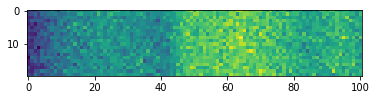

In [52]:
import matplotlib.pyplot 
%matplotlib inline 
image  = matplotlib.pyplot.imshow(data) 
matplotlib.pyplot.show(image) 

Dark regions in this heat map are low values, while light regions show high values. As we can see, most stars in our data show roughly the same trends with time. 

<section class="panel panel-info">
<div class="panel-heading">
<h2><span class="fa fa-thumb-tack"></span>Some IPython 'magic'</h2>
</div>
</section>

> If you’re using an IPython / Jupyter notebook, you’ll need to execute the following command in order for your matplotlib images to appear in the notebook when ```show()``` is called:

> ```python
> % matplotlib inline
> ```

> The % indicates an IPython magic function - a function that is only valid within the IPython environment. Note that you only have to execute this function once per notebook.

---

Let's take a look at the average brightness of a star over time:

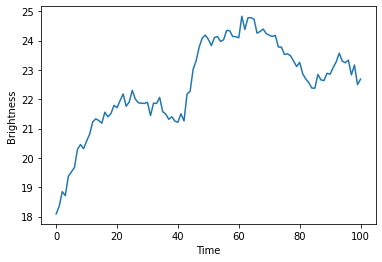

In [53]:
ave_brightness = data.mean(axis=0)
ave_plot = matplotlib.pyplot.plot(ave_brightness)
matplotlib.pyplot.xlabel('Time')
matplotlib.pyplot.ylabel('Brightness')
matplotlib.pyplot.show()

Here, we have put the average across all stars in the variable `ave_brightness`, then asked `matplotlib.pyplot` to create and display a line graph of those values.

Since most stars follow the same trend, these changes in brightness can't be intrinsic to the stars themselves. They are probably changes due to clouds absorbing some of the light from all of the stars we see in our data.

We could see if any of the stars deviate from this common trend by dividing the brightness of each star the average brightness of all stars:

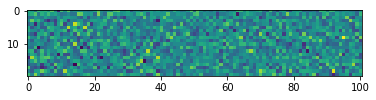

In [54]:
processed_data = data / ave_brightness
image  = matplotlib.pyplot.imshow(processed_data) 
matplotlib.pyplot.show(image) 

It looks like all of our stars just follow this general trend, since there is nothing but random noise left in the processed data. If any of our stars were varying, it should stand out in this plot. 

Interestingly, it looks like all of our stars show roughly the same amount of noise - a fact that can be confirmed using `numpy` and an extra plot.

Std. deviation of star 0 is  0.032118377876345104
Std. deviation of star 1 is  0.03204199284194356
Std. deviation of star 2 is  0.031276317635962676


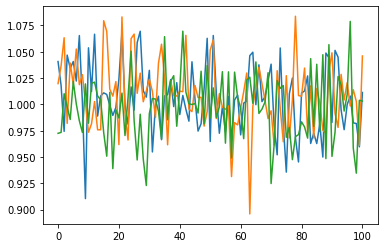

In [55]:
print("Std. deviation of star 0 is ", processed_data[0,:].std())
print("Std. deviation of star 1 is ", processed_data[1,:].std())
print("Std. deviation of star 2 is ", processed_data[2,:].std())
matplotlib.pyplot.plot(processed_data[0,:])
matplotlib.pyplot.plot(processed_data[1,:])
matplotlib.pyplot.plot(processed_data[2,:])
matplotlib.pyplot.show()

<section class="challenge panel panel-success"> 
<div class="panel-heading">
<h2><span class="fa fa-pencil"></span>Check your understanding</h2>
</div>
</section>

> Which variables refer to what values after each statement in the following program? Check your answer with the person next to you, then run the program in the cell below and see if you were correct.  (What are the values of `age` and `mass` after this code is run?)
```python
mass = 47.5
age  = 122
mass = mass*2.0
age  = age-20
```

In [56]:
# INSERT YOUR CODE HERE

In [57]:
mass = 47.5
age  = 122
mass = mass*2.0
age  = age-20

In [59]:
# mass will be 95
# age will be 102
mass, age

(95.0, 102)

<section class="challenge panel panel-success"> 
<div class="panel-heading">
<h2><span class="fa fa-pencil"></span>Sorting out references</h2>
</div>
</section>

> What does the following program print out?
```python
first, second = 'Grace', 'Hopper'
third, fourth = second, first
print(third, fourth)
```
Run the code below and see if you were right.

In [ ]:
# INSERT YOUR CODE HERE

In [60]:
first, second = 'Grace', 'Hopper'
third, fourth = second, first
print(third, fourth)

Hopper Grace


<section class="challenge panel panel-success"> 
<div class="panel-heading">
<h2><span class="fa fa-pencil"></span>Slicing strings</h2>
</div>
</section>

>A section of an array is called a [slice](reference.html#slice). We can take slices of character strings as well:

In [ ]:
element = 'oxygen'
print ('first three characters:', element[0:3])
print ('last three characters:', element[3:6])

> What is the value of `element[:4]`?
> What about `element[4:]`?
> Or `element[:]`?
>
> What is `element[-1]`?
> What is `element[-2]`?
> Given those answers,
> explain what `element[1:-1]` does.

Put your answers in a Markdown cell below this one

```
element[-1] = n
element[-2] = e
element[1:-1] = xyge
```

<section class="challenge panel panel-success"> 
<div class="panel-heading">
<h2><span class="fa fa-pencil"></span>Make your own plot</h2>
</div>
</section>

>Create a plot showing the standard deviation (`numpy.std`) of each star against the star number

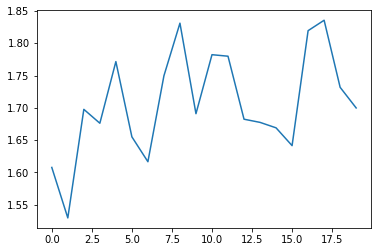

In [62]:
stddevs = np.std(data, axis=1)
matplotlib.pyplot.plot(stddevs)